Pada proyek ini kita sedang mengikuti  program magang di departemen analitik perusahaan Y.Afisha. lalu tugas utama pada proyek kali ini adalah membantu perusahaan untuk mengoptimalkan anggaran pemasaran di perusahaan.

langkah-langkah yang kurang lebih akan dikerjakan adalah sbb:
1. memasukkan library yang diperlukan dan data-data perusahaan
2. mengecek apakah adda kesalahan data (tipe data, penulisan kolom, dduplikat, nilai kosong, dll)
3. membuat dataframe sesuai kebutuhan dan memvisualisasikannya
4. penulisan kesimpulan terhadap analisis yang telah dilakukann

## Import Library dan data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
visit = pd.read_csv('/datasets/visits_log_us.csv')
order = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

## Pra-pemrosesan data

### Visit

Tabel visits (log/catatan server yang memuat data kunjungan ke situs web):
1. Uid — ID pengguna
2. Device — perangkat pengguna
3. Start Ts — tanggal dan waktu dimulainya sesi
4. End Ts — tanggal dan waktu berakhirnya sesi
5. Source Id — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

In [3]:
visit.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visit.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visit['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [6]:
visit['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [7]:
visit.duplicated().sum()

0

terdapat beberapa kesalahan di dataframe visit, antara lain:
1. penamaan kolom masih menggunakan huruf kapital dan menggunakan spasi. seharusnya menggunakan huruf kecil dan spasi diganti dengan garis bawah
2. nilai pada kolom device bisa diganti dengan tipe data category
3. nilai pada kolom end_ts dan start_ts bisa diubah ke format datetime

In [8]:
#merubah nama kolom dengan format yang seharusnya
visit = visit.rename(columns={
    'Device' : 'device',
    'End Ts' : 'end_ts',
    'Source Id' : 'source_id',
    'Start Ts' : 'start_ts',
    'Uid' : 'uid'
})

In [9]:
#mengubah tipe data dengan tipe data yang benar
visit['device'] = visit['device'].astype('category')
visit['source_id'] = visit['source_id'].astype('category')
visit['end_ts'] = pd.to_datetime(visit['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visit['start_ts'] = pd.to_datetime(visit['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
#pengecekan apakah tipe data sudah benar
visit.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  category      
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


### Order

Tabel orders (data terkait pesanan):
1. Uid — ID pengguna yang membuat pesanan
2. Buy Ts — tanggal dan waktu pesanan dibuat
3. Revenue — pendapatan Y.Afisha dari pesanan tersebut

In [11]:
order.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
order.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [13]:
order.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [14]:
order.duplicated().sum()

0

terdapat kesalahan di dataframe order, antara lain:
1. format nama kolom salah
2. kolom buy ts seharusnya memiliki tipe objek datetime

In [15]:
#merubah nama kolom dengan format yang seharusnya
order = order.rename(columns={
    'Buy Ts' : 'buy_ts',
    'Revenue' : 'revenue',
    'Uid' : 'uid'
})

In [16]:
order['buy_ts'] = pd.to_datetime(order['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

In [17]:
#pengecekan apakah tipe data sudah benar
order.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### costs

Tabel costs (data terkait pengeluaran pemasaran):
1. source_id — ID sumber iklan
2. dt — tanggal
3. costs — pengeluaran untuk sumber iklan pada tanggal tersebut

In [18]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [19]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [20]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [21]:
order.duplicated().sum()

0

terdapat kesalahan di dataframe costs yaitu tipe data kolom dt seharusnya memiliki tipe data datetime

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

In [23]:
#pengecekan apakah tipe data sudah benar
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Susun laporan dan hitung metrik-metrik yang diperlukan

### Produk

#### Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

In [24]:
#membuat kolom baru yang memisahkan nilai-nilai dari start_ts ke beberapa parameter
visit['visit_year'] = visit['start_ts'].dt.year
visit['visit_month'] = visit['start_ts'].dt.month
visit['visit_week'] = visit['start_ts'].dt.week
visit['visit_date'] = visit['start_ts'].dt.date
visit.head()


/tmp/ipykernel_28/921267672.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visit['visit_week'] = visit['start_ts'].dt.week


,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [25]:
dau_total_visit = visit.groupby('visit_date').agg({'uid' : 'nunique'}).mean()
wau_total_visit = visit.groupby(['visit_year','visit_week']).agg({'uid' : 'nunique'}).mean()
mau_total_visit = visit.groupby(['visit_year','visit_month']).agg({'uid' : 'nunique'}).mean()

print('Rata-rata pengguna produk harian adalah:',int(dau_total_visit), 'orang')
print('Rata-rata pengguna produk mingguan adalah:',int(wau_total_visit), 'orang')
print('Rata-rata pengguna produk bulanan adalah:',int(mau_total_visit), 'orang')

Rata-rata pengguna produk harian adalah: 907 orang
Rata-rata pengguna produk mingguan adalah: 5716 orang
Rata-rata pengguna produk bulanan adalah: 23228 orang


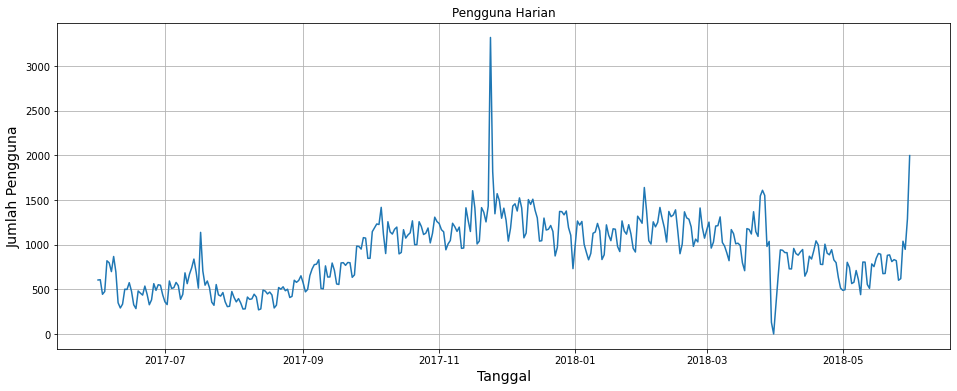

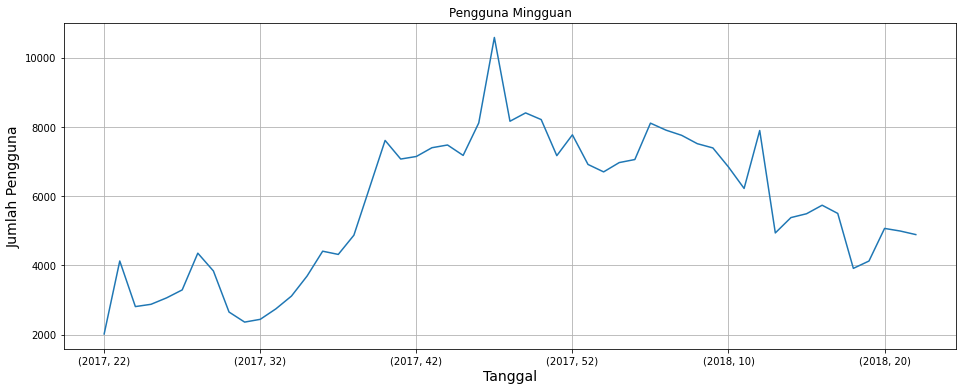

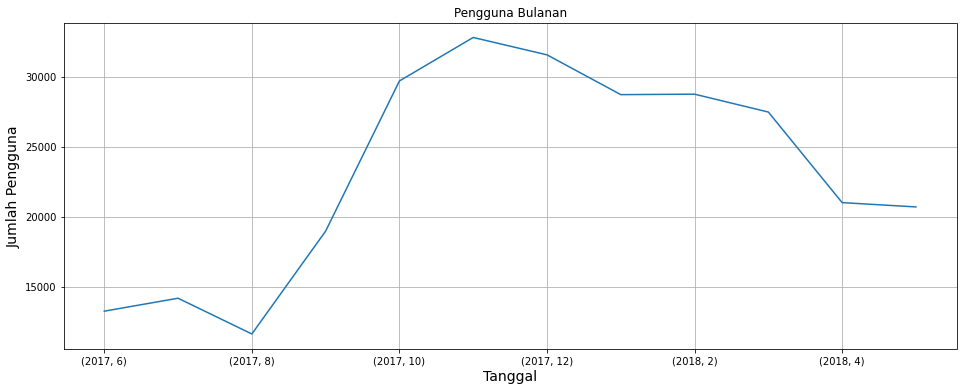

In [26]:
fig, ax = plt.subplots(figsize=(16,6))
visit.groupby('visit_date')['uid'].nunique().plot()
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Pengguna',fontsize=14)
plt.title('Pengguna Harian')
plt.grid(True)

fig, ax = plt.subplots(figsize=(16,6))
visit.groupby(['visit_year','visit_week'])['uid'].nunique().plot()
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Pengguna',fontsize=14)
plt.title('Pengguna Mingguan')
plt.grid(True)

fig, ax = plt.subplots(figsize=(16,6))
visit.groupby(['visit_year','visit_month'])['uid'].nunique().plot()
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Pengguna',fontsize=14)
plt.title('Pengguna Bulanan')
plt.grid(True)


Berdasarkan data diatas dapat disimpulkan bahwa:
   1. Rata-rata pengguna produk harian 907 orang, mulai ada peningkatan pada 2017 bulan 09
   2. Rata-rata pengguna produk mingguan 5716 orang, mengalami peningkatan pada tahun 2017 minggu ke 32 dan mulai mengalami penurunan pada sekitar minggu ke 47
   3.Rata-rata pengguna produk bulanan 23228 orang, pada akhir tahun cenderung mengalami peningkatan dan ketika sampai pertengahan tahun mengalami penurunan

#### Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi).

In [27]:
session_per_user = visit.groupby('visit_date').agg({'uid' : ['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['sess_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
session_per_user['sess_per_user'] = session_per_user['sess_per_user'].astype('int')
session_per_user.head()

,n_sessions,n_users,sess_per_user
visit_date,,,
2017-06-01,664,605,1
2017-06-02,658,608,1
2017-06-03,477,445,1
2017-06-04,510,476,1
2017-06-05,893,820,1


In [28]:
print('Jumlah rata rata sesi perhari adalah:',session_per_user['n_sessions'].mean().astype(int))

Jumlah rata rata sesi perhari adalah: 987


<AxesSubplot:>

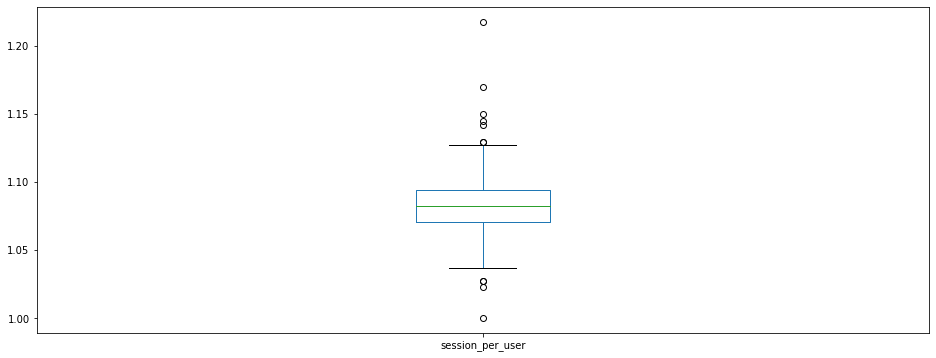

In [29]:
fig, ax = plt.subplots(figsize=(16,6))
visit.groupby(['visit_date','uid']).size().reset_index().rename(columns=({0: 'session_per_user'}))\
    .groupby('visit_date')['session_per_user'].mean().plot(kind='box')

berdasarkan penelitian diatas dapat ditarik kesimpulan bahwa rata-rata jumlah sesi perhari adalah 987 kali, dan setiap user melakukan 1 sesi perhari. bisa dikatakan produk ini tidak dipakai setiap hari oleh para user

#### Berapa lama durasi untuk setiap sesi?

In [30]:
visit['duration_sec'] = (visit['end_ts'] - visit['start_ts']).dt.seconds
asl = visit['duration_sec'].mode()
print('Durasi rata-rata keseluruhan penggunaan setiap sesi:', visit['duration_sec'].mean().astype('int'), 'detik')
print('ASL:',asl[0], 'detik')

Durasi rata-rata keseluruhan penggunaan setiap sesi: 643 detik
ASL: 60 detik


Secara rata-rata keseluruhan penggunaan untuk setiap sesi adalah 643 detik (sekitar 10 menit), akan tetapi jika melihat ASL adalah sekitar 60 detik (1 menit)

#### Seberapa sering pengguna kembali untuk menggunakan produk?


In [31]:
#membuat sticky factor week dan month
sticky_factor_week = dau_total_visit / wau_total_visit *100
sticky_factor_month = dau_total_visit / mau_total_visit *100

print(sticky_factor_week)
print(sticky_factor_month)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Tingkat pengguna kembali menggunakan produk berdasarkan hitungan perminggu adalah sebesar 15,8% sedangkan jika dilihat perbulan sebesar 3,9%

### Penjualan

#### Kapan orang-orang mulai melakukan pembelian?

In [32]:
#mencari selisih antara pertama kunjungan dengan pembelian pertama
first_order = pd.DataFrame(visit.groupby('uid')['start_ts'].min())\
    .join(\
         pd.DataFrame(order.groupby('uid')['buy_ts'].min()),how ='inner')
first_order['diff'] = first_order['buy_ts'] - first_order['start_ts']      
first_order.sort_values(by='buy_ts').head()

,start_ts,buy_ts,diff
uid,,,
10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,0 days 00:01:00
11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,0 days 00:11:00
17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,0 days 00:02:00
16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,0 days 00:15:00
14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,0 days 00:27:00


In [33]:
first_order.describe()

,diff
count,36523
mean,16 days 21:40:10.550064343
std,47 days 01:44:46.481416776
min,0 days 00:00:00
25%,0 days 00:04:00
50%,0 days 00:16:00
75%,2 days 00:17:00
max,363 days 07:04:00


Orang-orang mulai melakukan pembelian pertama sejak 2017-06-01 00:10:00	dan jika dilihat dari mediannya, biasanya mereka melakukan pembelian pertama 16 menit setelah melakukan kunjungan 

#### Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?

In [34]:
#membuat kapan pengguna membeli produk
first_order_dates = order.groupby('uid')['buy_ts'].min()
first_order_dates.name = 'first_order_datetime'
order= order.join(first_order_dates, on='uid')


In [35]:
#membuat pembelian pertama
first_order_cohort = order.groupby('uid')['buy_ts'].min().dt.to_period('M')
first_order_cohort.name = 'first_order_cohort'
order = order.join(first_order_cohort, on='uid')

In [36]:
order.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06


In [37]:
#membuat selisih antara bulan pembelian dengan bulan pembelian pertama
order['order_month'] = order['buy_ts'].astype('datetime64[M]')
order['first_order_month'] = order['first_order_datetime'].astype('datetime64[M]')
order['month_diff'] = order.apply(lambda x: round((x.order_month - x.first_order_month) / np.timedelta64(1,'M')), axis=1)
order.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort,order_month,first_order_month,month_diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,2017-06-01,0


In [38]:
month_diff = ((order['order_month'] - order['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')
month_diff.value_counts()

0     41588
1      2404
2      1519
3      1221
4       945
5       738
6       682
7       483
8       377
9       223
10      149
11       86
dtype: int64

In [39]:
pivot_cohort = order.groupby(['first_order_cohort','month_diff'])['uid'].count().reset_index()\
                .pivot_table(index='first_order_cohort', columns = 'month_diff', values='uid')
pivot_cohort

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_cohort,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

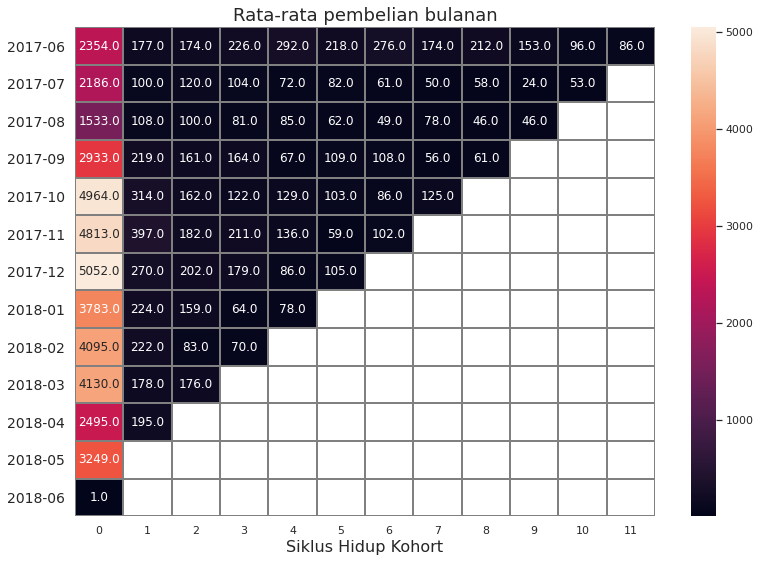

In [40]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Rata-rata pembelian bulanan',fontsize=18)
ax= sns.heatmap(pivot_cohort,annot=True,fmt='.1f',linewidths=1,linecolor='gray')
ax.tick_params(axis='y', rotation = 0, labelsize=14)
ax.set_xlabel('Siklus Hidup Kohort', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show

dari table diatas diperoleh kesimpulan bahwa setiap siklus hidup pertama di semua kohort mengalami penurunan, dan kohort 2017-06 bisa dibilang mempunyai rata-rata pembelian bulanan yang lebih stabil daripada kohort yang lain

#### Berapa besaran rata-rata pembeliannya?


In [41]:
#memecah data dari kolom buy_ts
order['order_dt'] = order['buy_ts'].dt.date
order['order_week'] = order['buy_ts'].astype('datetime64[W]')
order['order_month'] = order['buy_ts'].astype('datetime64[M]')
order.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort,order_month,first_order_month,month_diff,order_dt,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01


In [42]:
#membuat df penjualan perhari
sales_daily = order.groupby('order_dt').agg({'revenue' : ['sum', 'count','mean']})
sales_daily.head()

revenue                
               sum count      mean
order_dt                          
2017-06-01  389.46    96  4.056875
2017-06-02  324.11   111  2.919910
2017-06-03  166.48    67  2.484776
2017-06-04  195.21    66  2.957727
2017-06-05  441.49   161  2.742174

In [43]:
#membuat df penjualan perminggu
sales_weekly = order.groupby('order_week').agg({'revenue' : ['sum', 'count','mean']})
sales_weekly.head()

revenue                
                sum count      mean
order_week                         
2017-06-01  2546.66   896  2.842254
2017-06-08  2536.51   525  4.831448
2017-06-15  1527.33   341  4.478974
2017-06-22  2099.22   441  4.760136
2017-06-29  2449.82   461  5.314143

In [44]:
#membuat df penjualan perbulan
sales_monthly = order.groupby('order_month').agg({'revenue' : ['sum', 'count','mean']})
sales_monthly.head()

revenue                
                  sum count      mean
order_month                          
2017-06-01    9557.49  2354  4.060106
2017-07-01   12539.47  2363  5.306589
2017-08-01    8758.78  1807  4.847139
2017-09-01   18345.51  3387  5.416448
2017-10-01   27987.70  5679  4.928280

Text(0.5, 1.0, 'Grafik Rata-rata Penjualan Perhari')

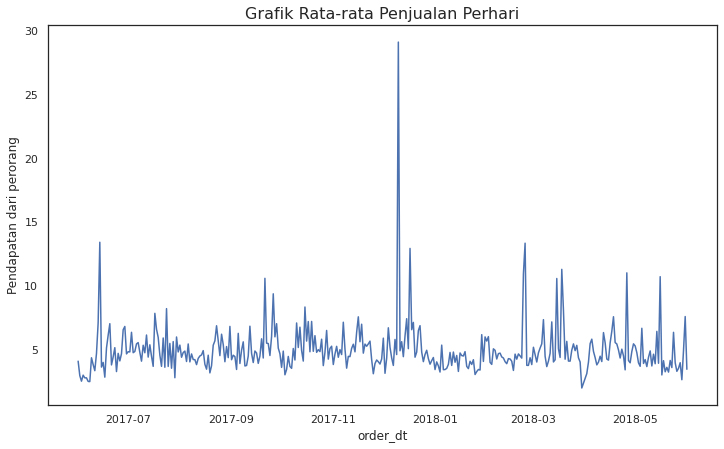

In [45]:
sales_daily['revenue']['mean'].plot(figsize=(12,7))
plt.ylabel('Pendapatan dari perorang')
plt.title('Grafik Rata-rata Penjualan Perhari', fontsize=16)

In [46]:
sales_daily[sales_daily['revenue']['mean'] > 20]

revenue                 
                sum count       mean
order_dt                            
2017-12-10  4661.33   160  29.133313

Text(0.5, 1.0, 'Grafik Rata-rata Penjualan Perminggu')

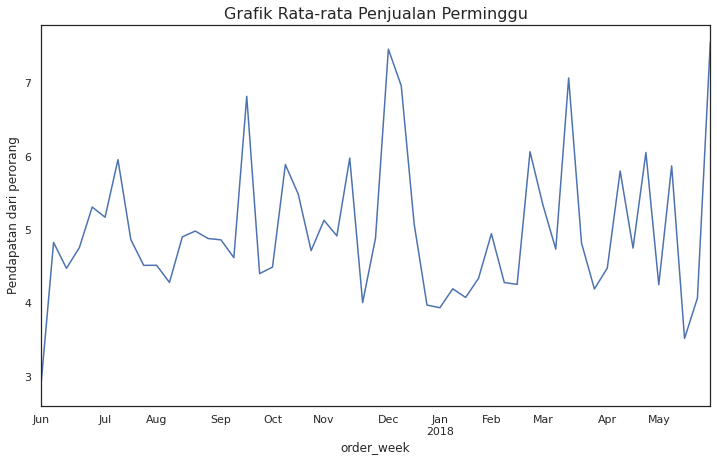

In [47]:
sales_weekly['revenue']['mean'].plot(figsize=(12,7))
plt.ylabel('Pendapatan dari perorang')
plt.title('Grafik Rata-rata Penjualan Perminggu', fontsize=16)

Text(0.5, 1.0, 'Grafik Rata-rata Penjualan Perbulan')

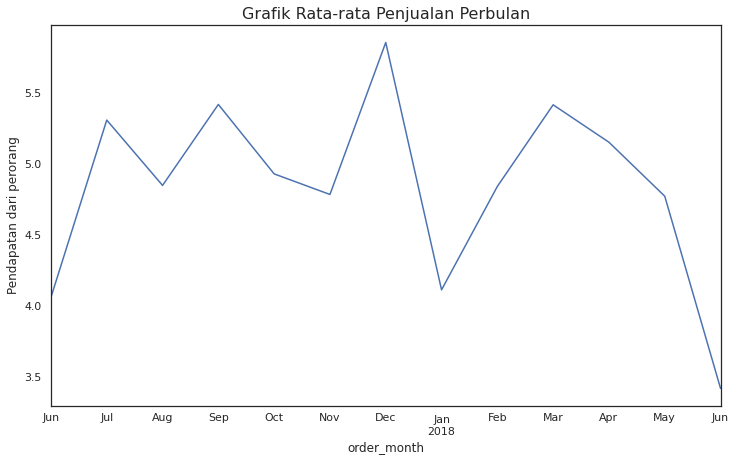

In [48]:
sales_monthly['revenue']['mean'].plot(figsize=(12,7))
plt.ylabel('Pendapatan dari perorang')
plt.title('Grafik Rata-rata Penjualan Perbulan', fontsize=16)

dari grafik diatas diperoleh kesimpulan bahwa pada 2017-12-10 terdapat rata-rata pemasukan yang cukup tinggi dibanding hari-hari biasanya, dan pada pergantian tahun mengalami penurunan yang lumayan tinggi

#### Berapa jumlah uang yang mereka kontribusikan? (LTV)

In [49]:
order.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort,order_month,first_order_month,month_diff,order_dt,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01


In [50]:
#mengansumsikan perusahaan menetapkan laba 50% dari pendapatan
#membuat berdasarkan siklus hidup kohort
avg_buy = order.groupby(['first_order_cohort','month_diff',]).agg({'uid' : 'nunique', 'revenue' : 'sum'}).reset_index()
avg_buy['avg_purchase'] = avg_buy['revenue'] / avg_buy['uid']
avg_buy['gross_profit'] = avg_buy['revenue']*0.5
avg_buy['ltv'] = avg_buy['gross_profit'] / avg_buy['uid']
avg_buy.head()

,first_order_cohort,month_diff,uid,revenue,avg_purchase,gross_profit,ltv
0,2017-06,0,2023,9557.49,4.724414,4778.745,2.362207
1,2017-06,1,61,981.82,16.095410,490.910,8.047705
2,2017-06,2,50,885.34,17.706800,442.670,8.853400
3,2017-06,3,54,1931.30,35.764815,965.650,17.882407
4,2017-06,4,88,2068.58,23.506591,1034.290,11.753295


In [51]:
avg_buy_pivot = avg_buy.pivot_table(index = 'first_order_cohort', columns = 'month_diff', values = 'ltv')
avg_buy_pivot

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_cohort,,,,,,,,,,,,
2017-06,2.362207,8.047705,8.853400,17.882407,11.753295,11.103881,15.505968,12.516596,9.647845,13.616778,12.840667,4.902075
2017-07,3.005109,6.198173,10.517982,5.393047,3.469082,3.948421,3.210556,3.496410,3.691071,6.430909,5.756923,NaN
2017-08,2.638259,5.574397,5.925660,6.091477,8.460625,6.069531,4.810167,6.305227,10.535000,4.153710,NaN,NaN
2017-09,2.822265,11.094192,6.722600,69.334595,9.940769,13.047500,13.718561,8.480676,5.522326,NaN,NaN,NaN
2017-10,2.501866,5.643714,3.376626,3.706576,3.536398,3.627569,3.286607,3.739851,NaN,NaN,NaN,NaN
2017-11,2.577341,3.669527,3.393292,6.255330,3.728642,2.290417,3.782419,NaN,NaN,NaN,NaN,NaN
2017-12,2.369095,3.908288,19.683010,24.067526,13.715700,11.759206,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,2.067818,4.360614,6.182771,5.599884,2.349778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,2.078494,4.305000,2.471207,3.470513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

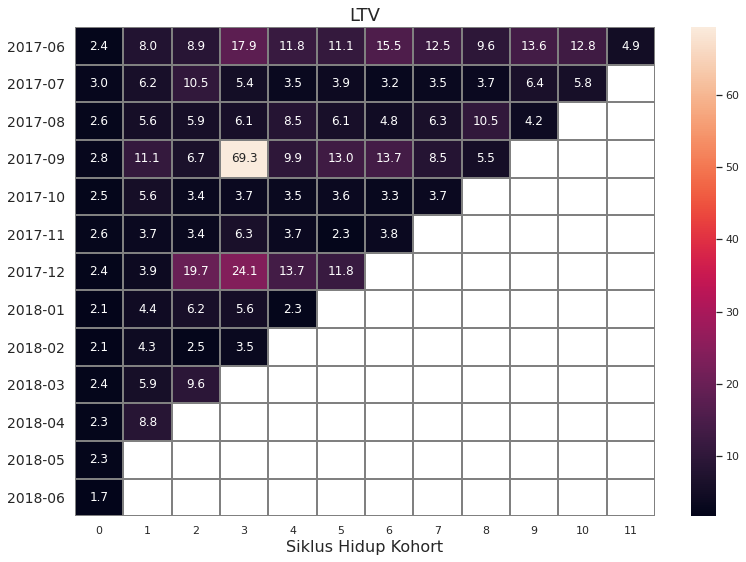

In [52]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('LTV',fontsize=18)
ax= sns.heatmap(avg_buy_pivot,annot=True,fmt='.1f',linewidths=1,linecolor='gray')
ax.tick_params(axis='y', rotation = 0, labelsize=14)
ax.set_xlabel('Siklus Hidup Kohort', fontsize=16)
ax.set_ylabel('', fontsize=16)
plt.show

ddari tabel diatas diperoleh kesimpulan bahwa pada semua kohort mengalami peningkatan ltv pada siklus hidup pertama, kohort 2017-06 memberikan ltv yang cukup stabil, dan terdapat ltv yang cukup tinggi pada kohort 2017-09 dan 2017-12

### Pemasaran

#### Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu

In [53]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [54]:
print('Jumlah keseluruhan Uang yang dihabiskan adalah:', costs['costs'].sum())

Jumlah keseluruhan Uang yang dihabiskan adalah: 329131.62


In [55]:
print('Jumlah uang yang dihabiskan berdasasrkan source:')
print(costs.groupby('source_id')['costs'].sum())

Jumlah uang yang dihabiskan berdasasrkan source:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [56]:
#membuat berdasarkan waktu
costs['costs_week'] = costs['dt'].astype('datetime64[W]')
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs['costs_year'] = costs['dt'].astype('datetime64[Y]')

In [57]:
print('Jumlah uang yang dihabiskan berdasarkan minggu:')
print(costs.groupby('costs_week')['costs'].sum().head())

Jumlah uang yang dihabiskan berdasarkan minggu:
costs_week
2017-06-01    4750.61
2017-06-08    4427.52
2017-06-15    3933.09
2017-06-22    3753.14
2017-06-29    3743.03
Name: costs, dtype: float64


In [58]:
print('Jumlah uang yang dihabiskan berdasarkan bulan:')
print(costs.groupby('costs_month')['costs'].sum().head())

Jumlah uang yang dihabiskan berdasarkan bulan:
costs_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costs, dtype: float64


In [59]:
print('Jumlah uang yang dihabiskan berdasarkan tahun:')
print(costs.groupby('costs_year')['costs'].sum().head())

Jumlah uang yang dihabiskan berdasarkan tahun:
costs_year
2017-01-01    187961.15
2018-01-01    141170.47
Name: costs, dtype: float64


#### Berapa biaya akuisisi pelanggan dari masing-masing sumber?


In [60]:
visit.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [61]:
#mencari source_id pertama dari uid
users = visit.sort_values('start_ts').groupby('uid').first()
users.head()

,device,end_ts,source_id,start_ts,visit_year,visit_month,visit_week,visit_date,duration_sec
uid,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,3,9,2018-03-01,360
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2,6,2018-02-06,120
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,6,23,2017-06-07,60
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,9,38,2017-09-18,1080
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017,9,39,2017-09-30,540


In [62]:
#mengambil soource_id masing2 uid
users = users[['source_id']]
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [63]:
#membuat dataframe yang menggabungkan df order dengan user yang berisi source_id dari masing2 uid
buyers = pd.merge(order, users, left_on ='uid', right_index=True)
buyers.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort,order_month,first_order_month,month_diff,order_dt,order_week,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,3


In [64]:
#membuat dataframe yang berisikan berapa banyak n-user dari masing2 source_id dan first_order_datetime
buyers_daily = buyers.groupby(['source_id' , 'first_order_datetime']).agg({'uid' : 'count'}).reset_index()
buyers_daily.rename(columns={'uid' : 'n_buyers'}, inplace = True)
buyers_daily.head()

,source_id,first_order_datetime,n_buyers
0,1,2017-06-01 00:10:00,1
1,1,2017-06-01 00:25:00,0
2,1,2017-06-01 00:27:00,0
3,1,2017-06-01 00:29:00,0
4,1,2017-06-01 07:58:00,0


In [65]:
buyers_daily.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307098 entries, 0 to 307097
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   source_id             307098 non-null  category      
 1   first_order_datetime  307098 non-null  datetime64[ns]
 2   n_buyers              307098 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 5.0 MB


In [66]:
# menghapus baris dengan nilai n_buyers <= 0 yang sangat mengganggu proses analisa dikarenakan memerlukan banyak memori
# mengubah datetime menjadi hari agar bisa digabung dengan df costs yang disusun berdasarkan hari
buyers_daily = buyers_daily.drop(buyers_daily[buyers_daily['n_buyers'] <= 0].index)
buyers_daily['first_order_datetime'] = (buyers_daily['first_order_datetime'].dt.date)
buyers_daily['first_order_datetime'] = pd.to_datetime(buyers_daily['first_order_datetime'])

In [67]:
buyers_daily.sort_values(['first_order_datetime','source_id'])

,source_id,first_order_datetime,n_buyers
0,1,2017-06-01,1
7,1,2017-06-01,239
8,1,2017-06-01,1
12,1,2017-06-01,3
16,1,2017-06-01,1
...,...,...,...
307081,10,2018-05-31,1
307083,10,2018-05-31,1
307091,10,2018-05-31,1
307094,10,2018-05-31,1


In [68]:
costs.sort_values(['dt', 'source_id']).head(10)

,source_id,dt,costs,costs_week,costs_month,costs_year
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-01-01
363,2,2017-06-01,132.56,2017-06-01,2017-06-01,2017-01-01
726,3,2017-06-01,349.38,2017-06-01,2017-06-01,2017-01-01
1089,4,2017-06-01,76.74,2017-06-01,2017-06-01,2017-01-01
1452,5,2017-06-01,73.24,2017-06-01,2017-06-01,2017-01-01
1816,9,2017-06-01,13.06,2017-06-01,2017-06-01,2017-01-01
2179,10,2017-06-01,15.08,2017-06-01,2017-06-01,2017-01-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01,2017-01-01
364,2,2017-06-02,132.38,2017-06-01,2017-06-01,2017-01-01
727,3,2017-06-02,314.22,2017-06-01,2017-06-01,2017-01-01


In [69]:
#menggabungkan costs dengan buyers_daily yang memuat berapa orang pembeli baru berdasarkan first_order_datetime dan source

costs2_daily =  pd.merge(costs,buyers_daily, left_on = ['source_id','dt'], right_on = ['source_id', 'first_order_datetime'])\
    .groupby(['first_order_datetime', 'source_id','costs','costs_year','costs_month']).agg({'n_buyers' : 'sum'}).reset_index()
costs2_daily.sort_values(['first_order_datetime','source_id']).head(10)

,first_order_datetime,source_id,costs,costs_year,costs_month,n_buyers
0,2017-06-01,1,75.20,2017-01-01,2017-06-01,278
1,2017-06-01,2,132.56,2017-01-01,2017-06-01,52
2,2017-06-01,3,349.38,2017-01-01,2017-06-01,53
3,2017-06-01,4,76.74,2017-01-01,2017-06-01,16
4,2017-06-01,5,73.24,2017-01-01,2017-06-01,24
5,2017-06-01,9,13.06,2017-01-01,2017-06-01,13
6,2017-06-01,10,15.08,2017-01-01,2017-06-01,1
7,2017-06-02,1,62.25,2017-01-01,2017-06-01,34
8,2017-06-02,2,132.38,2017-01-01,2017-06-01,11
9,2017-06-02,3,314.22,2017-01-01,2017-06-01,43


In [70]:
# membuat berapa biaya cac perhari masing-masing source
costs2_daily['cost_per_buyer'] = costs2_daily['costs'] / costs2_daily['n_buyers']
costs2_daily.head(10)

,first_order_datetime,source_id,costs,costs_year,costs_month,n_buyers,cost_per_buyer
0,2017-06-01,1,75.20,2017-01-01,2017-06-01,278,0.270504
1,2017-06-01,2,132.56,2017-01-01,2017-06-01,52,2.549231
2,2017-06-01,3,349.38,2017-01-01,2017-06-01,53,6.592075
3,2017-06-01,4,76.74,2017-01-01,2017-06-01,16,4.796250
4,2017-06-01,5,73.24,2017-01-01,2017-06-01,24,3.051667
5,2017-06-01,9,13.06,2017-01-01,2017-06-01,13,1.004615
6,2017-06-01,10,15.08,2017-01-01,2017-06-01,1,15.080000
7,2017-06-02,1,62.25,2017-01-01,2017-06-01,34,1.830882
8,2017-06-02,2,132.38,2017-01-01,2017-06-01,11,12.034545
9,2017-06-02,3,314.22,2017-01-01,2017-06-01,43,7.307442


In [71]:
#meilhat cac bulanan per source_id
costs2_monthly = costs2_daily.groupby(['costs_month','source_id','costs_year']).agg({'costs':'sum','n_buyers':'sum'}).reset_index()
costs2_monthly['cost_per_buyer'] = costs2_monthly['costs'] / costs2_monthly['n_buyers']
costs2_monthly.head(10)

,costs_month,source_id,costs_year,costs,n_buyers,cost_per_buyer
0,2017-06-01,1,2017-01-01,1103.93,1143,0.965818
1,2017-06-01,2,2017-01-01,2427.38,635,3.822646
2,2017-06-01,3,2017-01-01,7731.65,878,8.805979
3,2017-06-01,4,2017-01-01,3514.80,638,5.509091
4,2017-06-01,5,2017-01-01,2616.12,877,2.983033
5,2017-06-01,9,2017-01-01,242.28,155,1.563097
6,2017-06-01,10,2017-01-01,283.25,112,2.529018
7,2017-07-01,1,2017-01-01,1072.88,410,2.616780
8,2017-07-01,2,2017-01-01,2333.11,383,6.091671
9,2017-07-01,3,2017-01-01,7674.37,698,10.994799


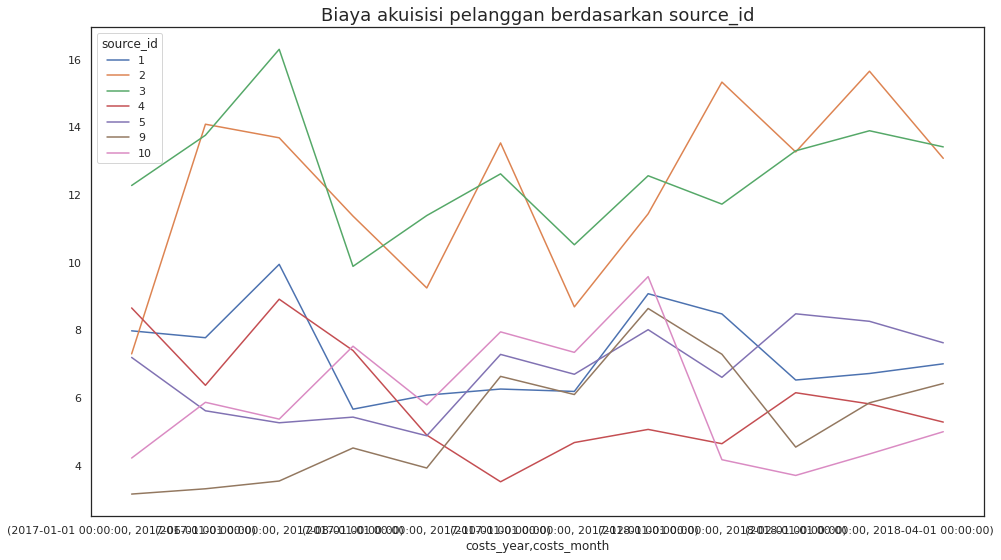

In [72]:
costs2_daily_pivot = costs2_daily.pivot_table(index=['costs_year','costs_month'], columns='source_id', values='cost_per_buyer',aggfunc='mean')
costs2_daily_pivot.plot(figsize=(16,9))
plt.title('Biaya akuisisi pelanggan berdasarkan source_id',fontsize=18)
plt.show()

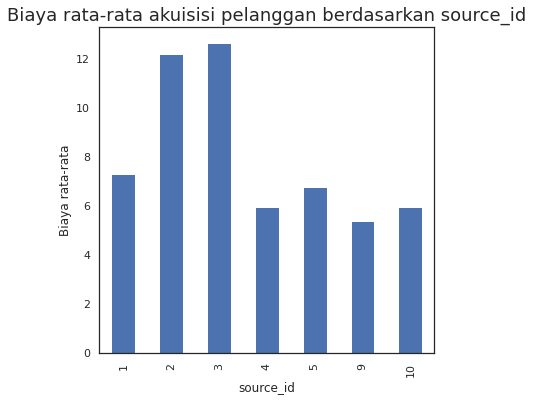

In [73]:
plt.figure(figsize=(6,6))
plt.title('Biaya rata-rata akuisisi pelanggan berdasarkan source_id',fontsize=18)
plt.ylabel('Biaya rata-rata')
costs2_daily.groupby('source_id')['cost_per_buyer'].mean().plot(kind='bar')
plt.show()

dari grafik diatas bisa disimpulkan bahwa source_id 2 dan 3 mempuyai biayay yang tinggi dibandingkan dengan source_id lainnya yang bisa dikatakan tidak jauh berbeda 

#### Seberapa menguntungkannya investasi tersebut? (ROI)


cari ltv per sourceid
ltv per source / cac per source

cac persource perbulan costs2_monthly
ltv persource perbulan avg_buy2

In [74]:
buyers.head()

,buy_ts,revenue,uid,first_order_datetime,first_order_cohort,order_month,first_order_month,month_diff,order_dt,order_week,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01,3


In [75]:
buyers['first_order_year'] = buyers['first_order_datetime'].astype('datetime64[Y]')

In [76]:
#mencari LTV per source id berdasarkan bulan pertama order
#mengansumsikan perusahaan menetapkan laba 50% dari pendapatan
avg_buy2 = buyers.groupby(['source_id','first_order_month','first_order_year']).agg({'uid' : 'nunique', 'revenue' : 'sum'}).reset_index()
avg_buy2['avg_purchase'] = avg_buy2['revenue'] / avg_buy2['uid']
avg_buy2['gross_profit'] = avg_buy2['revenue']*0.5
avg_buy2['ltv'] = avg_buy2['gross_profit'] / avg_buy2['uid']


In [77]:
avg_buy2.sort_values(['first_order_month','source_id']).head(10)

,source_id,first_order_month,first_order_year,uid,revenue,avg_purchase,gross_profit,ltv
0,1,2017-06-01,2017-01-01,190,6392.39,33.644158,3196.195,16.822079
1,1,2017-06-01,2018-01-01,0,0.00,NaN,0.000,NaN
26,2,2017-06-01,2017-01-01,235,3915.26,16.660681,1957.630,8.330340
27,2,2017-06-01,2018-01-01,0,0.00,NaN,0.000,NaN
52,3,2017-06-01,2017-01-01,638,3640.32,5.705831,1820.160,2.852915
53,3,2017-06-01,2018-01-01,0,0.00,NaN,0.000,NaN
78,4,2017-06-01,2017-01-01,413,4992.67,12.088789,2496.335,6.044395
79,4,2017-06-01,2018-01-01,0,0.00,NaN,0.000,NaN
104,5,2017-06-01,2017-01-01,384,4377.64,11.400104,2188.820,5.700052
105,5,2017-06-01,2018-01-01,0,0.00,NaN,0.000,NaN


In [78]:
costs2_monthly.head(10)

,costs_month,source_id,costs_year,costs,n_buyers,cost_per_buyer
0,2017-06-01,1,2017-01-01,1103.93,1143,0.965818
1,2017-06-01,2,2017-01-01,2427.38,635,3.822646
2,2017-06-01,3,2017-01-01,7731.65,878,8.805979
3,2017-06-01,4,2017-01-01,3514.80,638,5.509091
4,2017-06-01,5,2017-01-01,2616.12,877,2.983033
5,2017-06-01,9,2017-01-01,242.28,155,1.563097
6,2017-06-01,10,2017-01-01,283.25,112,2.529018
7,2017-07-01,1,2017-01-01,1072.88,410,2.616780
8,2017-07-01,2,2017-01-01,2333.11,383,6.091671
9,2017-07-01,3,2017-01-01,7674.37,698,10.994799


In [79]:
#ltv per source / cac per source
#membuat df roi bulanan
roi_monthly = pd.merge(avg_buy2,costs2_monthly,\
                       left_on = ['source_id','first_order_month','first_order_year'],\
                       right_on = ['source_id','costs_month','costs_year'])\
                       .sort_values(['first_order_month','source_id'])
roi_monthly.head(10)

,source_id,first_order_month,first_order_year,uid,revenue,avg_purchase,gross_profit,ltv,costs_month,costs_year,costs,n_buyers,cost_per_buyer
0,1,2017-06-01,2017-01-01,190,6392.39,33.644158,3196.195,16.822079,2017-06-01,2017-01-01,1103.93,1143,0.965818
12,2,2017-06-01,2017-01-01,235,3915.26,16.660681,1957.630,8.330340,2017-06-01,2017-01-01,2427.38,635,3.822646
24,3,2017-06-01,2017-01-01,638,3640.32,5.705831,1820.160,2.852915,2017-06-01,2017-01-01,7731.65,878,8.805979
36,4,2017-06-01,2017-01-01,413,4992.67,12.088789,2496.335,6.044395,2017-06-01,2017-01-01,3514.80,638,5.509091
48,5,2017-06-01,2017-01-01,384,4377.64,11.400104,2188.820,5.700052,2017-06-01,2017-01-01,2616.12,877,2.983033
60,9,2017-06-01,2017-01-01,68,472.15,6.943382,236.075,3.471691,2017-06-01,2017-01-01,242.28,155,1.563097
72,10,2017-06-01,2017-01-01,95,241.26,2.539579,120.630,1.269789,2017-06-01,2017-01-01,283.25,112,2.529018
1,1,2017-07-01,2017-01-01,160,3342.52,20.890750,1671.260,10.445375,2017-07-01,2017-01-01,1072.88,410,2.616780
13,2,2017-07-01,2017-01-01,208,2357.57,11.334471,1178.785,5.667236,2017-07-01,2017-01-01,2333.11,383,6.091671
25,3,2017-07-01,2017-01-01,512,3761.04,7.345781,1880.520,3.672891,2017-07-01,2017-01-01,7674.37,698,10.994799


In [80]:
roi_monthly['roi'] = roi_monthly['ltv'] / roi_monthly['cost_per_buyer'] 
roi_monthly.head(10)

,source_id,first_order_month,first_order_year,uid,revenue,avg_purchase,gross_profit,ltv,costs_month,costs_year,costs,n_buyers,cost_per_buyer,roi
0,1,2017-06-01,2017-01-01,190,6392.39,33.644158,3196.195,16.822079,2017-06-01,2017-01-01,1103.93,1143,0.965818,17.417442
12,2,2017-06-01,2017-01-01,235,3915.26,16.660681,1957.630,8.330340,2017-06-01,2017-01-01,2427.38,635,3.822646,2.179208
24,3,2017-06-01,2017-01-01,638,3640.32,5.705831,1820.160,2.852915,2017-06-01,2017-01-01,7731.65,878,8.805979,0.323975
36,4,2017-06-01,2017-01-01,413,4992.67,12.088789,2496.335,6.044395,2017-06-01,2017-01-01,3514.80,638,5.509091,1.097167
48,5,2017-06-01,2017-01-01,384,4377.64,11.400104,2188.820,5.700052,2017-06-01,2017-01-01,2616.12,877,2.983033,1.910824
60,9,2017-06-01,2017-01-01,68,472.15,6.943382,236.075,3.471691,2017-06-01,2017-01-01,242.28,155,1.563097,2.221034
72,10,2017-06-01,2017-01-01,95,241.26,2.539579,120.630,1.269789,2017-06-01,2017-01-01,283.25,112,2.529018,0.502088
1,1,2017-07-01,2017-01-01,160,3342.52,20.890750,1671.260,10.445375,2017-07-01,2017-01-01,1072.88,410,2.616780,3.991689
13,2,2017-07-01,2017-01-01,208,2357.57,11.334471,1178.785,5.667236,2017-07-01,2017-01-01,2333.11,383,6.091671,0.930325
25,3,2017-07-01,2017-01-01,512,3761.04,7.345781,1880.520,3.672891,2017-07-01,2017-01-01,7674.37,698,10.994799,0.334057


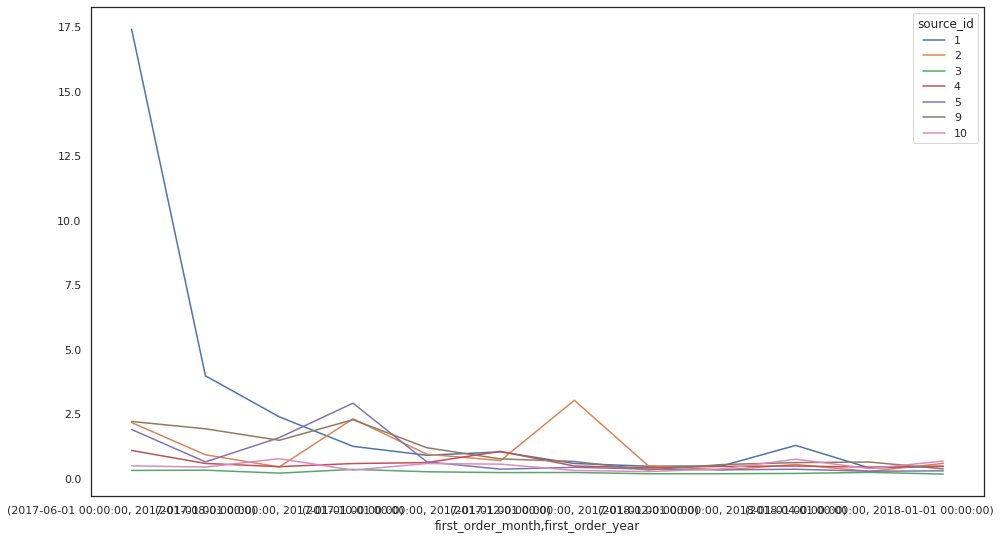

In [81]:
roi_monthly_pivot = roi_monthly.pivot_table(index=['first_order_month','first_order_year'], columns='source_id', values='roi',aggfunc='mean')
roi_monthly_pivot.plot(figsize=(16,9))
plt.show()

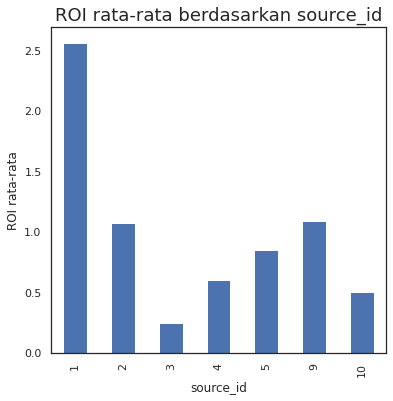

In [82]:
plt.figure(figsize=(6,6))
plt.title('ROI rata-rata berdasarkan source_id',fontsize=18)
plt.ylabel('ROI rata-rata')
roi_monthly.groupby('source_id')['roi'].mean().plot(kind='bar')
plt.show()

berdasarkan tabel diatas diperoleh bahwa source_id 1 memiliki tingkat rata-rata ROI yang jauh lebih tinggi daripada source_id yang lain,tetapi jika dilihat dari grafik keseluruhan source_id 1 mengalami penurunan yang drastis, tetapi pada source_id 2 5,9 beberapakali mengalami kenaikan ROI yang menonjol, dan jika dilihat secara keseluruhan grafik tingkat ROI ini cukup rendah berkisar 1-2% saja

### Kesimpulan

setelah melewati beberapa analisis saya merekomendasikan sumber 2, 5 dan 9. alasannya adalah sumber itu memiliki angka roi yang bisa dibilang tinggi daripada roi sumber lainnya. bisa dilihat pada grafik di 3.3.3 bahwa sumber-sumber tersebut memiliki satu waktu kenaikan ROI secara bersamaan. jadi menurut data ini saya merekomendasikan kepada spesialis marketing untuk memfokuskan padda sumber 2,5 dan 9